In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import MSFT.csv, and add a new feature - logreturn
ap = pd.DataFrame.from_csv('MSFT.csv')
ap_data = ap.loc['2015-01-01':'2019-12-31']
ap_data['logReturn'] = np.log(ap_data['Close'].shift(-1)) - np.log(ap_data['Close'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


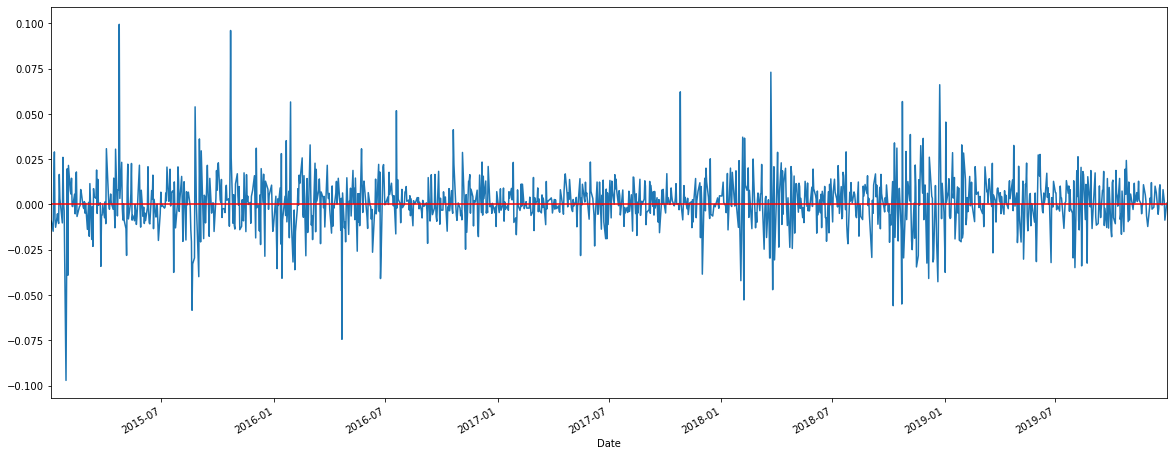

In [3]:
# Log return goes up and down during the period
ap_data['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

In [4]:
#Steps involved in testing a claim by hypothesis testing
#Step 1: Set hypothesis
#H0:μ=0 Ha:μ≠0
#H0 means the average stock return is 0 H1 means the average stock return is not equal to 0

In [5]:
sample_mean = ap_data['logReturn'].mean()
sample_std = ap_data['logReturn'].std(ddof=1)
n = ap_data['logReturn'].shape[0]


zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

2.338082358627645


In [6]:
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


In [7]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: True


In [8]:
#one tail test
#H0:μ≤0   Ha:μ>0
# step 2
sample_mean = ap_data['logReturn'].mean()
sample_std = ap_data['logReturn'].std(ddof=1)
n = ap_data['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

2.338082358627645


In [9]:
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


In [10]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: True


In [11]:
#An alternative method: p-value# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.009691488090215472


In [12]:
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: True
